In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pds

In [ ]:
!apt install octave

# Aplicações em Comunicações

Today, MATLAB is widely used in the simulation of various communication systems. In this chapter, we will focus on several applications dealing with waveform representation and coding, especially speech coding, and digital communication. In particular, we will describe several methods for digitizing analog waveforms with specific application to speech encoding and transmission. These methods are pulse-code modulation, differential PCM and adaptive differential PCM, delta modulation and adaptive delta modulation, and linear predictive coding. A project incorporating each of these waveform coding methods for simulation using MATLAB is formulated.
The last three topics covered in this chapter deal with signal detection applications typically encountered when implementing a receiver in a digital communication system. For each of these topics, we describe a project that includes implementations through simulation of the detection scheme in MATLAB.

## 12.1 MODULAÇÃO DE PULSE-CODE

A modulação por código de pulso é um método de quantização de um sinal analógico com a finalidade de transmitir ou armazenar o sinal em formato digital. O PCM é amplamente utilizado para transmissão de fala em comunicações telefônicas e para sistemas de telemetria que usam transmissão de rádio. Concentraremos nossa atenção na aplicação do PCM ao processamento de sinais de fala.

O processo de quantização pode ser modelado matematicamente como$ \bar{s}(n) = s(n) + q(n) $

Os sinais de fala têm a característica de que pequenas amplitudes de sinal ocorrem com mais frequência do que grandes amplitudes de sinal. No entanto, um quantizador uniforme fornece o mesmo espaçamento entre níveis sucessivos em toda a faixa dinâmica do sinal. Uma abordagem melhor é usar um quantizador não uniforme, que fornece níveis mais espaçados em baixas amplitudes de sinal e níveis mais amplamente espaçados em grandes amplitudes de sinal. Para um quantizador não uniforme com b bits, o erro de quantização resultante tem um valor rms menor que o dado por . Uma característica do quantizador não uniforme é normalmente obtida passando o sinal através de um dispositivo não linear que comprime a amplitude do sinal, seguido por um quantificador uniforme. Por exemplo, um compressor logarítmico usado nos sistemas de telecomunicações dos Estados Unidos e Canadá.

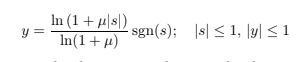

O padrão de compressor logarítmico usado nas telecomunicações europeias
sistemas de nicação é chamado de A-law e é definido como:

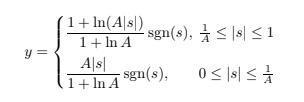

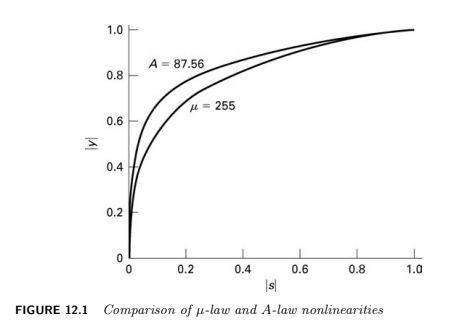


### 12.1.1 PROJETO 12.1: PCM

O objetivo deste projeto é obter uma compreensão do PCM
expansão (linear para logarítmica) e expansão PCM (logarítmica para linear).

Escreva as três funções MATLAB a seguir para este projeto:

1. uma função de compressor de lei μ para implementar que aceita um zero-
média normalizada $(|s| ≤ 1)$ e produz um sinal comprimido de média zero
sinal com μ como um parâmetro livre que pode ser especificado,
2. uma função quantizadora que aceita uma entrada de média zero e produz um
saída inteira após quantização de b-bit que pode ser especificada, e
3. um expansor de lei μ para implementar  que aceita uma entrada inteira
e produz uma saída de média zero para um parâmetro μ especificado.

Para fins de simulação, gere um grande número de amostras (10.000
ou mais) das seguintes sequências: (a) uma sequência dente de serra, (b) uma exposição
seqüência de trem de pulso necial, (c) uma seqüência senoidal, e (d) uma seqüência aleatória
seqüência com pequena variação. Deve-se tomar cuidado para gerar dados não periódicos
sequências escolhendo suas frequências normalizadas como números irracionais
(ou seja, os valores de amostra não devem ser repetidos).

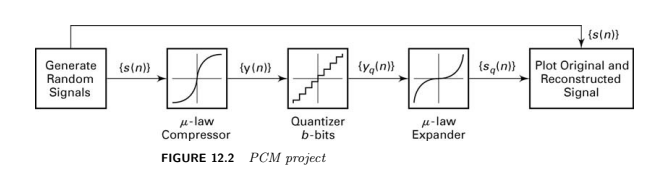

## 12.2 PCM DIFERENCIAL (DPCM)

No PCM, cada amostra de forma de onda é codificada independentemente de todas as outras amostras.
A taxa de Nyquist ou mais rápida mostra correlação significativa entre amostras consecutivas. Em outras palavras, a mudança média na amplitude entre amostras sucessivas é relativamente pequena. Consequentemente, um esquema de codificação que usa redundância nos padrões resultará em uma taxa de bits mais baixa para o sinal de fala.
Uma solução relativamente simples é codificar as diferenças entre amostras consecutivas em vez das próprias amostras. Como se espera que as diferenças entre as amostras sejam menores do que as amplitudes amostradas reais, menos bits são necessários para representar as diferenças. um refinamento
desta abordagem geral é prever a amostra atual com base no
p amostras anteriores. Para ser específico, deixe $s(n)$ denotar a amostra atual de
fala e deixe $\hat{s}(n)$ denotar o valor previsto de $s(n)$, definido como \begin{equation} \hat{s}(n) = \sum_{i=1}^{p}a(i)s(n-i)  \end{equation}

Cada valor de
o erro de previsão quantizado $\tilde{e}(n)$ é codificado em uma sequência de binários:

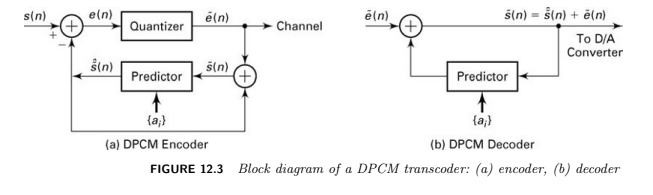


### 12.2.1 P12.2.1 PROJETO 12.2: DPCM

O objetivo deste projeto é obter compreensão da codificação DPCM
operações de codificação e decodificação. Para fins de simulação, gere correlatas sequências aleatórias usando um modelo de sinal polo-zero da forma
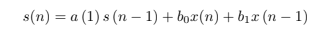

onde $x(n)$ é uma sequência Gaussiana de variância unitária com média zero. isso pode ser
feito usando a função de filtro.

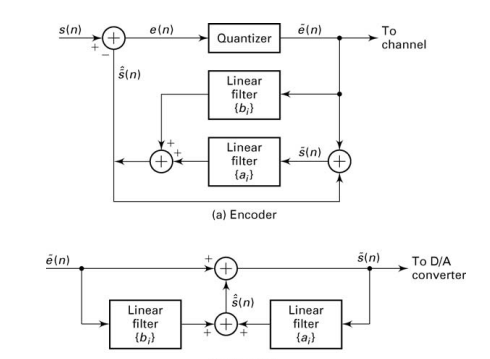

1. uma função preditora de modelo a ser implementada (12.12), dado o sinal de entrada
s(n);

2. uma função de codificador DPCM para implementar o diagrama de blocos da Figura 12.3a, que aceita uma sequência de entrada de média zero e produz uma
seqüência de erro inteiro de b bits quantizada, onde b é um parâmetro livre; e

3. uma função do decodificador DPCM da Figura 12.3b, que reconstrói o sinal
nal da sequência de erro quantizada.

## 12.3 PCM E DPCM ADAPTÁVEIS (ADPCM)

Em geral, a potência de um sinal de fala muda lentamente ao longo do tempo. No entanto, os codificadores PCM e DPCM são projetados com base no fato de que a força do sinal de voz é constante e, portanto, o quantizador é constante. A eficiência e o desempenho desses codificadores podem ser melhorados fazendo com que eles se adaptem ao nível de potência variável do sinal de fala em tempo lento.
Tanto no PCM quanto no DPCM, o erro de quantização q resultante de um quantizador uniforme operando em um sinal de entrada de nível de potência de variação lenta terá uma variância variável no tempo. Uma melhoria que reduz a faixa dinâmica do ruído de quantização é o uso de um quantizador adaptativo.
Os quantificadores adaptativos podem ser classificados como feed forward ou feedback. Um quantizador adaptativo feedforward define o tamanho do passo para cada amostra de sinal com base na medição da variação do sinal de fala de entrada. Por exemplo, a variância estimada com base em um estimador de janela deslizante é

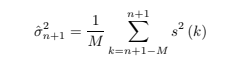

Então o tamanho do passo para o quantizador é
image.png

onde $M(n)$ é um fator de multiplicação cujo valor depende da quantidade
nível do quantizador para a amostra $s(n)$, e $∆(n)$ é o tamanho do passo do quantizador para
processamento s(n). Valores dos fatores de multiplicação otimizados para fala
codificação foram dadas por [14]. Esses valores são exibidos na Tabela 12.1
para quantização de 2, 3 e 4 bits para PCM e DPCM.
No DPCM, o preditor também pode ser adaptado. Assim na ADPCM
os coeficientes do preditor são alterados periodicamente para refletir o
alterando as estatísticas de sinal da fala. As equações lineares dadas por
(12.11) ainda se aplicam, mas a função de autocorrelação de curto prazo de s(n),
rss (m) muda com o tempo.

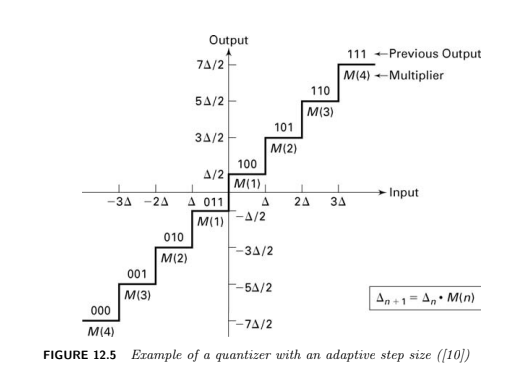

### 12.3.1 ADPCM STANDARD

A ADPCM
codificador é projetado para aceitar amostras de sinal comprimido PCM de 8 bits em
64.000 bps, e por meio de previsão adaptativa e 4 bits adaptável
quantização para reduzir a taxa de bits no canal para 32.000 bps. o
O decodificador ADPCM aceita o fluxo de dados de 32.000 bps e reconstrói
o sinal na forma de um PCM comprimido de 8 bits a 64.000 bps.

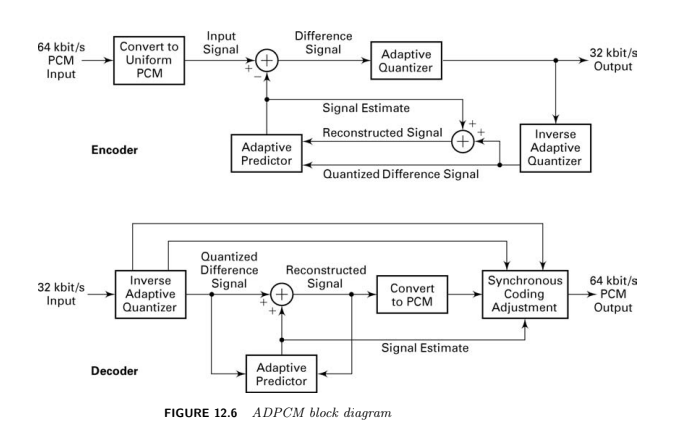

O codificador ADPCM aceita o sinal comprimido PCM de 8 bits e o expande para uma representação linear de 14 bits por amostra para processamento. O valor previsto é subtraído desse valor linear de 14 bits para produzir uma amostra de sinal de diferença que é enviada ao quantizador. A quantização adaptativa é executada no sinal de diferença para produzir uma saída de 4 bits para transmissão no canal. No decodificador de recepção e no decodificador do codificador interno, o valor ADPCM de 4 bits transmitido é usado para atualizar o quantizador adaptativo inverso, cuja saída é uma versão desquantizada do sinal de diferença. Este valor desquantizado é adicionado ao valor gerado pelo preditor adaptativo para produzir a amostra de fala reconstruída. Este sinal é a saída do decodificador, que é convertido em um sinal comprimido Sinal de formato PCM no receptor.

### 12.3.2 PROJETO 12.3: ADPCM

O objetivo deste projeto é familiarizar e entender o ADPCM e sua interface com o codificador/decodificador PCM.
Conforme descrito, o transcodificador ADPCM é inserido entre o compressor PCM e o expansor PCM, conforme mostrado na Figura 12.7. Use os módulos MATLAB PCM e DPCM que foram desenvolvidos para este projeto.
Projeto PCCM A saída do transcodificador pode ser plotada. Deve ser feita uma comparação entre o sinal de saída do transcodificador PCM-ADPCM com o sinal do transcodificador PCM e com o sinal de entrada original.

## 12.4 MODULAÇÃO DELTA (DM)

A modulação delta pode ser vista como uma forma simplificada de DPCM em que
um quantizador de 2 níveis (1 bit) é usado em conjunto com um quantizador fixo de 1ª ordem
previsor. O diagrama de blocos de um codificador-decodificador DM é mostrado em
Figura 12.8. Nós notamos que

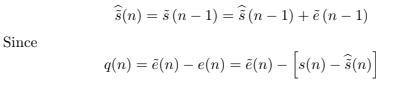

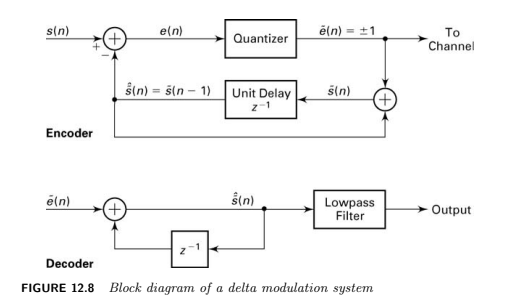

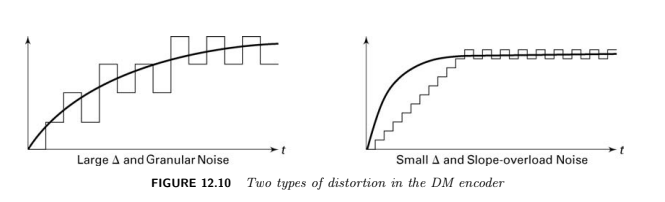

### 12.4.1 MODULAÇÃO DELTA ADAPTATIVA (ADM)

Uma variedade de métodos pode ser usada para definir adaptativamente o tamanho do passo em
cada iteração. A sequência de erro quantizada $\tilde{e}(n)$ fornece uma boa indicação
ção das características de inclinação da forma de onda que está sendo codificada. Quando o
erro quantizado $\tilde{e}(n)$ está mudando de sinal entre iterações sucessivas, isso
é uma indicação de que a inclinação da forma de onda na localidade é relativamente
pequeno. Por outro lado, quando a forma de onda tem uma inclinação acentuada, sucessivas
espera-se que os valores do erro ̃$\tilde{e}(n)$ tenham sinais idênticos. A partir desses ob-
serviços, é possível conceber algoritmos que diminuem ou aumentam o
tamanho do passo, dependendo dos valores sucessivos de ̃$\tilde{e}(n)$. Uma regra relativamente simples
idealizado por  é variar adaptativamente o tamanho do passo de acordo com a relação

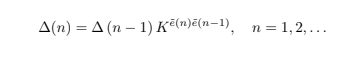

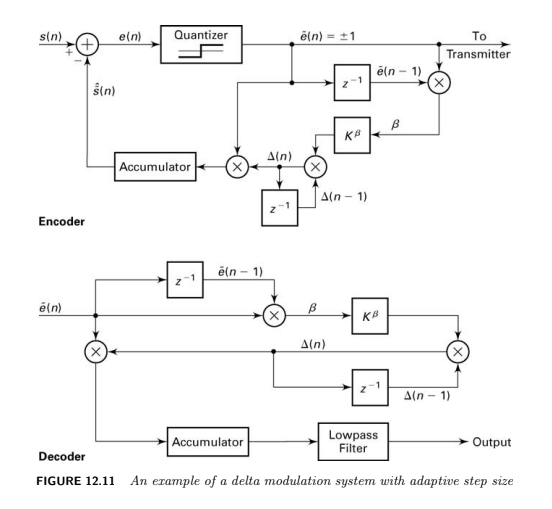

### 12.4.2 PROJETO 12.4: DM E ADM

O objetivo deste projeto é obter uma compreensão da modulação delta
ção e modulação delta adaptável para codificação de formas de onda. Este projeto
envolve escrever funções MATLAB para o codificador DM e decodificador como
mostrado na Figura 12.9, e para o codificador e decodificador ADM mostrados na
Figura 12.11. O filtro passa-baixa no decodificador pode ser implementado como um
filtro FIR de fase linear. Por exemplo, um filtro de Hanning que tem o impulso
resposta:

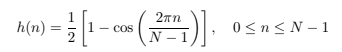

## 12.5 CODIFICAÇÃO PREDITIVA LINEAR (LPC) DA FALA

O método de codificação preditiva linear (LPC) para análise e sincronização de fala
tese é baseada na modelagem do trato vocal como um filtro linear all-polo (IIR)
tendo a função do sistema

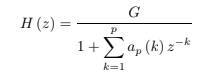

Dado um segmento de tempo curto de um sinal de fala, geralmente cerca de 20 ms
ou 160 amostras a uma taxa de amostragem de $8 kHz$, o codificador de fala no
transmissor deve determinar a função de excitação adequada, o pitch pe-
riod para fala vocalizada, o parâmetro de ganho G e os coeficientes$ ap (k)$.

Os parâmetros do modelo de filtro multipolar são facilmente determinados a partir de
as amostras de fala por meio de predição linear. Para ser específico, o
saída do filtro de previsão linear FIR é

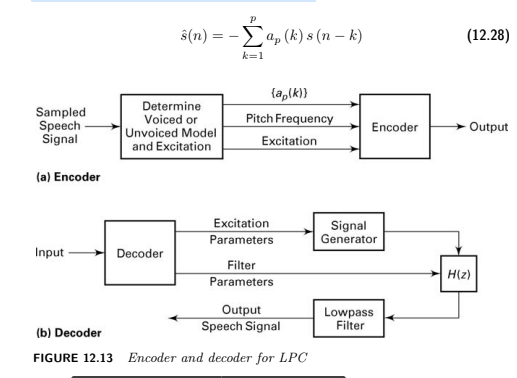

O objetivo deste projeto é analisar um sinal de fala através de um
codificador LPC e depois sintetizá-lo através do PLC correspondente
decodificador. Use vários arquivos de som .wav (amostrados a uma taxa de $8000 sam/s$),
que estão disponíveis no MATLAB para esta finalidade. Dividir sinais de fala
em segmentos de curta duração (com comprimentos entre 120 e 150 amostras) e
processar cada segmento para determinar a função de excitação adequada (voz
ou surdo), o período de tom para fala sonora, os coeficientes {ap (k)}
$(p ≤ 10)$, e o ganho $G$.


## 12.6 SINAIS DE MULTIFREQUÊNCIA DE TOM DUPLO (DTMF)

DTMF é o nome genérico para sinalização de telefone de botão que é
equivalente ao sistema Touch Tone em uso no Bell System. DTMF
também encontra uso generalizado em sistemas de correio eletrônico e serviços bancários por telefone
sistemas nos quais o usuário pode selecionar opções de um menu enviando
Sinais DTMF de um telefone.
Em um sistema de sinalização DTMF, uma combinação de um tom de alta frequência
e um tom de baixa frequência representam um dígito específico ou os caracteres *
e #. As oito frequências são arranjadas conforme mostrado na Figura 12.14, para
acomodar um total de 16 caracteres, 12 dos quais são atribuídos conforme mostrado,
enquanto os outros quatro são reservados para uso futuro.

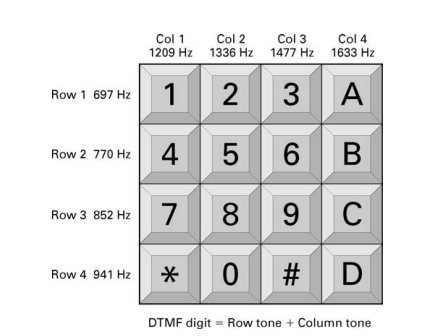

Na extremidade receptora, as palavras de dados digitais de 8 bits são comprimidas logarítmicas do codec recebido e expandidas logaritmicamente para seu formato linear de 16 bits. Em seguida, os tons são detectados para decidir qual dígito é transmitido. O algoritmo de detecção pode ser uma implementação DFT usando um algoritmo FFT ou uma implementação de banco de filtros. Para um número relativamente pequeno de negativos detectados, a implementação de um banco de filtros será mais eficiente. Descrevemos agora o uso do algoritmo de Goertzel para implementar 8 filtros ajustados. Lembre-se da discussão no Capítulo 5 de que a DFT de um ponto N
sequência de dados ${x(n)}$ é:

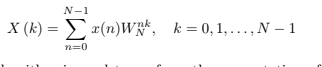

### 12.6.1 THE GOERTZEL ALGORITHM

O algoritmo de Goertzel explora a periodicidade dos fatores de fase ${W^k_
N }$ e nos permite expressar o cálculo da DFT como uma filtragem linear
Operação. Desde $W^{−kN}_ N = 1$, podemos multiplicar a DFT por este fator. Desta forma: 

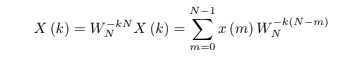

Este filtro tem um polo no círculo unitário na frequência $ω_k = 2πk/N.$
Assim, toda a DFT pode ser calculada passando o bloco de dados de entrada
em um banco paralelo de N filtros unipolares (ressonadores), onde cada filtro
tem um pólo na frequência correspondente do DFT.

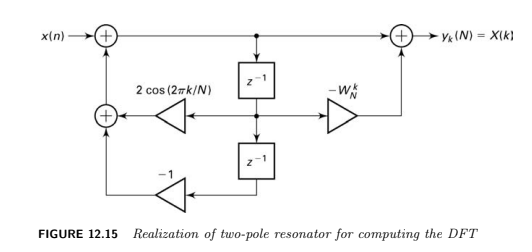

12.6.2 PROJETO 12.6: SINALIZAÇÃO DTMF

O objetivo deste projeto é obter uma compreensão do DTMF
software de geração de tons e o algoritmo de decodificação DTMF (o Goertzel
algoritmo). Projete os seguintes módulos MATLAB:

1. uma função de geração de tom que aceita uma matriz contendo dial-
dígitos e produz um sinal contendo tons apropriados com duração de 0,5 segundo para cada dígito na amostragem de 8 kHz
frequência
2. um gerador de tom de discagem gerando amostras de frequência de (350 + 440) Hz
no intervalo de amostragem de 8 kHz por uma quantidade especificada de duração
3. uma função de decodificação para implementar (12.50) que aceita um sinal DTMF
e produz uma matriz contendo dígitos de discagem

Gere várias matrizes de lista de discagem contendo uma combinação de dígitos e
tons de discagem. Experimente os módulos de geração e detecção de tom
e comente suas observações. Use a geração de som do MATLAB
capacidades para ouvir os tons e observar os componentes de frequência
dos tons gerados.

## 12.7 COMUNICAÇÕES DIGITAIS BINÁRIAS

Sinais de fala digitalizados que foram codificados via PCM, ADPCM, DM,
e LPC são geralmente transmitidos ao decodificador por meio de módulos digitais
lação. Um sistema de comunicação digital binário emprega dois sinais de onda
formas, digamos $s1(t) = s(t) e s2(t) = −s(t)$, para transmitir a sequência binária representando o sinal de fala.

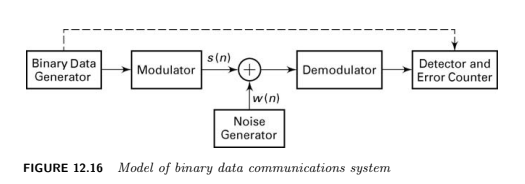

### 12.7.1 PROJETO 12.7: SISTEMA DE COMUNICAÇÃO DE DADOS BINÁRIOS

Um módulo gerador de dados binários que gera uma matriz de dígitos binários independentes com igual probabilidade. Um módulo modulador que mapeia
um dígito binário 1 a M sequências consecutivas de +1 e um dígito binário 0 a M sequências consecutivas de -1.
Assim, M +1s consecutivos representam uma versão amostrada do pulso retangular.
Um gerador de ruído que gera uma sequência de números distribuídos uniformemente em todo o intervalo. Cada amostra de ruído é adicionada a uma amostra de sinal correspondente.
Um módulo demodulador que coleta as M saídas sequenciais de seqüência distorcida de ruído +1s ou -1s recebidos do canal. Assumimos que o demodulador é síncrono no tempo, de modo que conhece o início e o fim de cada forma de onda.
Um detector e módulo de contagem de falhas. O detector compara a saída do modulador com zero e decide a favor de 1 se a saída for maior que zero e a favor de zero se a saída for menor que zero.


## 12.8 COMUNICAÇÕES DE ESPAÇO ESPECÍFICO

Sinais de espectro espalhado são frequentemente usados para transmitir dados digitais em canais de comunicação que são danificados por interferência devido a interferência intencional ou de outros usuários do canal. Em outras aplicações além das comunicações, os sinais de espalhamento espectral são usados para obter medições precisas de alcance e taxa de alcance em radar e navegação. Ao combater o bloqueio intencional, é importante para os comunicadores que o bloqueador que está tentando bloquear sua comunicação não tenha conhecimento prévio das características do sinal. Para conseguir isso, o transmissor introduz um elemento de imprevisibilidade ou aleatoriedade em cada uma das possíveis formas de onda do sinal transmitido, que é conhecido pelo receptor pretendido, mas não pelo bloqueador.
Os sinais transmitidos neste canal comum podem ser distinguidos uns dos outros pela sobreposição de um padrão pseudo-aleatório diferente, denominado código de acesso múltiplo, em cada sinal transmitido.

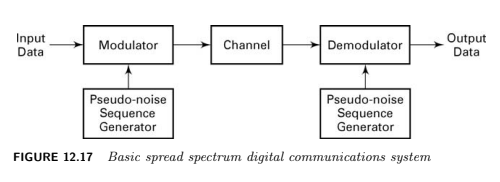

A sincronização da sequência PN gerada no demodulador com a sequência PN contida no sinal recebido de entrada é necessária para desmodular o sinal recebido. Inicialmente, antes da transmissão dos dados, a sincronização é conseguida pela transmissão de uma curta sequência PN fixa ao receptor para fins de estabelecimento da sincronização.

### 12.8.1 PROJETO 12.8: ESPALHAMENTO-ESPECTRO BINÁRIO COMUNICAÇÕES

Consideremos o sistema de comunicação binário descrito no Projeto 12.7 e multipliquemos a saída do modulador por uma sequência PN binária.
A mesma sequência PN binária é usada para multiplicar a entrada para o demodulador e assim remover o efeito da sequência PN no sinal desejado.

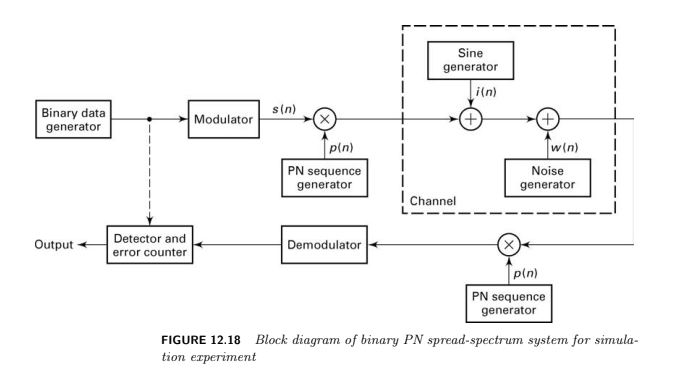

O sistema básico de espalhamento espectral binário é mostrado na Figura 12.18.
Como pode ser observado, este é apenas o sistema de comunicação digital binário
mostrado na Figura 12.16, ao qual adicionamos a interferência senoidal
e os geradores de sequência PN. A sequência PN pode ser gerada por
usando um gerador de números aleatórios para gerar uma sequência de números igualmente
$±1's$ capazes.
Execute o sistema simulado com e sem o uso do PN
sequência e meça a taxa de erro sob a condição de que A ≥ M
para diferentes valores de M, como $M = 50, 100, 500, 1000$. Explique o
efeito da sequência PN no sinal de interferência senoidal. Assim ex-
claro porque o sistema de espalhamento espectral PN supera o convencional
sistema de comunicação binário na presença do bloqueio senoidal
sinal.